# Heart Failure: Análisis de datos del dataset
## Primer análisis
El objetivo es conocer el dataset y realizar una exploración de los datos disponibles, con sus respectivos features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Obtengo los datos y muestro las primeras 10 filas
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab') # Colocar ruta de Colab
else:    
    dataset = './DS_ORIG/heart_failure_clinical_records_dataset.csv'

heart_data = pd.read_csv(dataset)
heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Features
A partir de los datos vistos en la tabla de arriba, podemos describir las siguientes features.

- `age`: Edad del paciente
- `anaemia`: Disminución de glóbulos rojos o hemoglobina (booleano)
- `creatinine_phosphokinase`: Nivel de enzimas CPK en sangre (mcg/L)
- `diabetes`: Si el paciente tiene/tuvo diabetes (booleano)
- `ejection_fraction`: Porcentaje de sangre que sale del corazón en cada contracción (porcentaje)
- `high_blood_pressure`: Si el paciente tiene hipertensión (booleano)
- `platelets`: Plaquetas en sangre (kiloplatelets/mL)
- `serum_creatinine`: Nivel de creatinina sérica en sangre (mg/dL)
- `serum_sodium`: Nivel de sodio serica en sangre (mEq/L)
- `sex`: Mujer u hombre (booleano)
- `smoking`: Si el paciente fuma o no (booleano)
- `time`: Periodo de seguimiento (días)
- `DEATH_EVENT`: Si el paciente falleció durante el periodo de seguimiento (booleano)

## Las patologías son un indicador de falla cardíaca?
Para comenzar con un primer análisis, tomaremos algunas features de patologías comunes entre los pacientes clínicos.

In [3]:
def pathologies_cases(data, feature: str, event: int) -> list:
    '''
    A partir de los datos obtenidos por el dataset, se filtran los features 
    según si existió un evento de fallecimiento o no. 
    Devuelve una lista con la cantidad por feature en cada evento.
    '''
    data_feature = data[data["DEATH_EVENT"]==event][feature]
    idx = pd.Index(data_feature)
    return list(idx.value_counts())

In [4]:
def plot_data(data: dict, index: list, kind='pie') -> None:
    '''
    Realiza los gráficos según el tipo de plot, mostrando los datos de un diccionario y un index.
    '''
    df_pathologies = pd.DataFrame(data, index=index)
    ax = df_pathologies.plot(kind=kind, rot=0, figsize=(20, 5), subplots=True, fontsize=13, autopct='%1.1f%%', colors=['gold', 'dodgerblue'])

In [5]:
# Elijo features de interés para un primer análisis
pathologies_feat = ["anaemia", "diabetes", "high_blood_pressure", "smoking"]

# Obtengo sobrevivientes y fallecidos con las patologías seleccionadas
p_surv = {f: pathologies_cases(data=heart_data, feature=f, event=0) for f in pathologies_feat}
p_dead = {f: pathologies_cases(data=heart_data, feature=f, event=1) for f in pathologies_feat}

{'anaemia': [120, 83], 'diabetes': [118, 85], 'high_blood_pressure': [137, 66], 'smoking': [137, 66]}


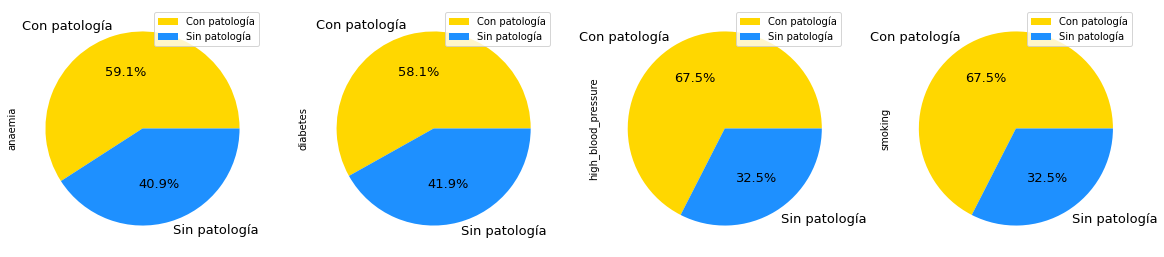

In [6]:
print(p_surv) # Cada feature muestra cantidad de 1 y 0 (tuvo o no tuvo dicha patologia)

# 1er plot tipo torta para los pacientes que sobrevivieron a un fallo cardíaco
plot_data(data=p_surv, index=['Con patología', 'Sin patología'])

{'anaemia': [50, 46], 'diabetes': [56, 40], 'high_blood_pressure': [57, 39], 'smoking': [66, 30]}


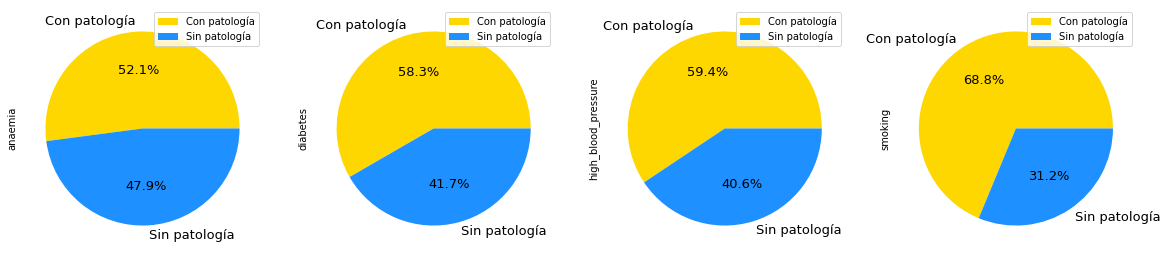

In [7]:
print(p_dead) # Cada feature muestra cantidad de 1 y 0 (tuvo o no tuvo dicha patologia)

# 2do plot tipo torta para los pacientes que fallecieron debido al fallo cardíaco
plot_data(data=p_dead, index=['Con patología', 'Sin patología'])

## Matriz de Correlación

<AxesSubplot:>

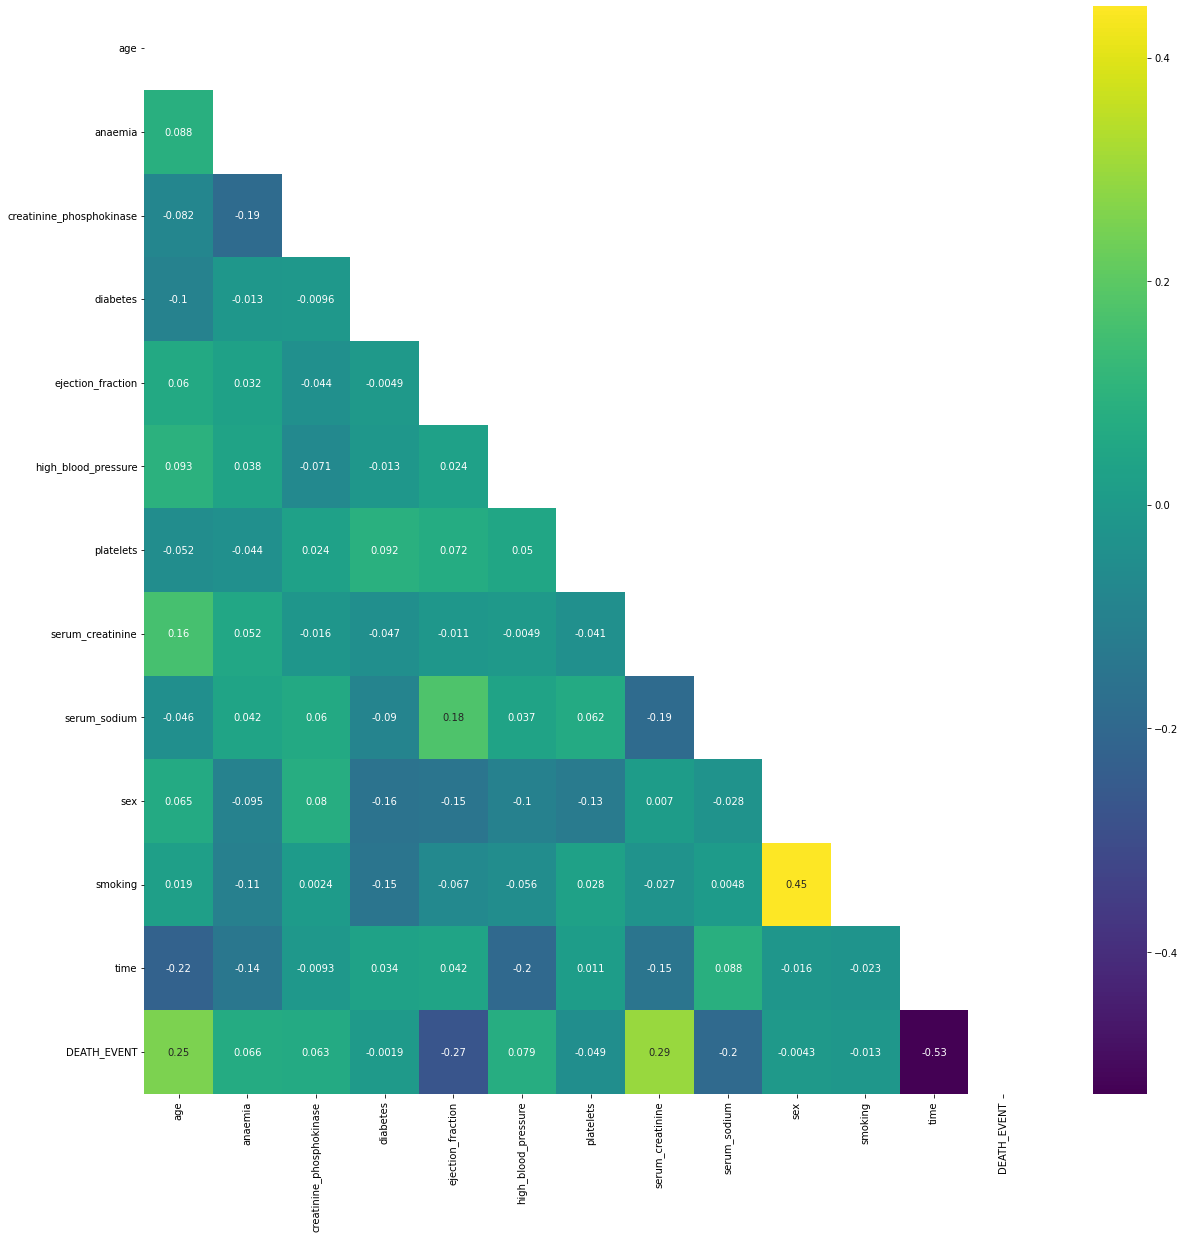

In [8]:

matrix_corr = heart_data.corr() #matriz de correlación de los features
mask = np.zeros_like(matrix_corr)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(matrix_corr,mask=mask,annot=True,cmap="viridis")

## Relación Patologías con #Muertos

      DEATH_EVENT variable  value
0               1  anaemia      0
1               1  anaemia      0
2               1  anaemia      0
3               1  anaemia      1
4               1  anaemia      1
...           ...      ...    ...
1191            0  smoking      1
1192            0  smoking      0
1193            0  smoking      0
1194            0  smoking      1
1195            0  smoking      1

[1196 rows x 3 columns]
(299, 5)
(1196, 3)


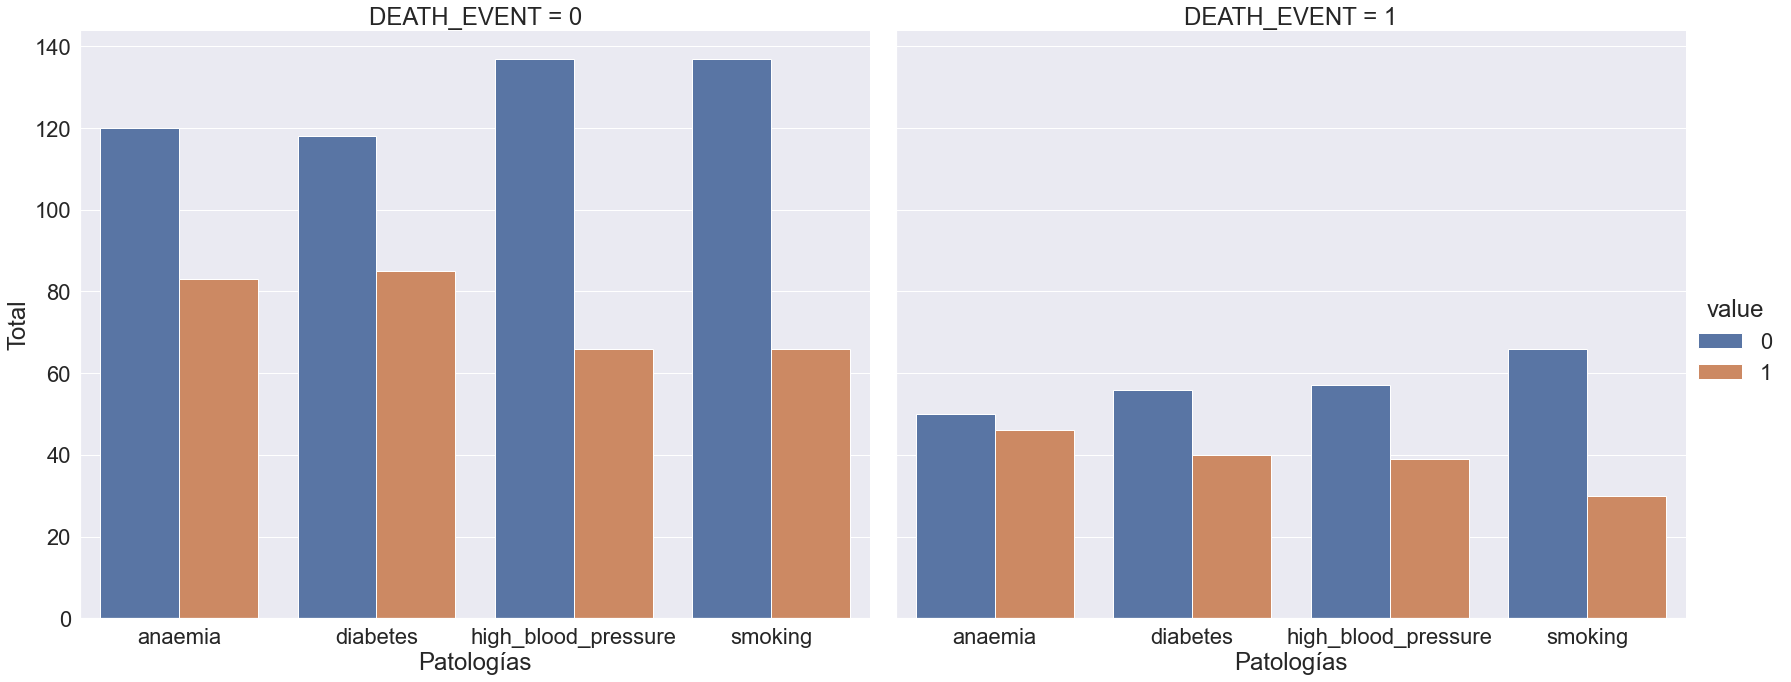

In [33]:
df = heart_data.copy()
df_pathologies = df.drop(columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'time'])  #elimino estos features
df_melted = pd.melt(df_pathologies,id_vars="DEATH_EVENT")

# print(df_melted)
# print(df_pathologies.shape)
# print(df_melted.shape)

sns.set(font_scale = 2)
fig = sns.catplot(data=df_melted,hue="value",x="variable",col="DEATH_EVENT",kind="count",height=10,aspect=1.2)
fig.set_axis_labels("Patologías", "Total")

## Distribución según cantidad de Patologías simultaneas

<Figure size 720x432 with 0 Axes>

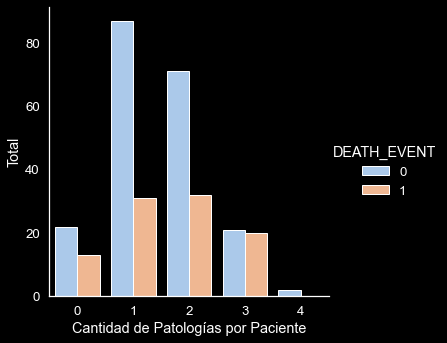

In [34]:
df_tendencia = df_pathologies.copy()
df_tendencia["#Pathologies"] = df["anaemia"]+df["diabetes"]+df["high_blood_pressure"]+df["smoking"]
df_tendencia.drop(columns=["anaemia","diabetes","high_blood_pressure","smoking"],inplace=True)

sns.set(font_scale = 1.2)
sns.set_style("dark")
plt.figure(figsize=(10, 6))
plt.style.use("dark_background")
fig = sns.catplot(data=df_tendencia,hue="DEATH_EVENT",x="#Pathologies",kind="count",height=5,palette="pastel")
fig.set_axis_labels("Cantidad de Patologías por Paciente", "Total")

---

## LEEMOS DATASET ORIGINAL PARA FILTRAR FEATURES Y DATOS NO DESEADOS

<AxesSubplot:xlabel='time', ylabel='Count'>

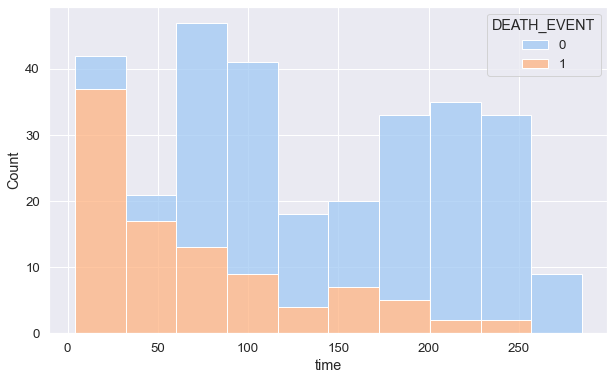

In [10]:
df_orig = heart_data.copy()

sns.set(font_scale = 1.2)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_orig,x=df_orig["time"],hue="DEATH_EVENT",palette="pastel",multiple="stack")

In [12]:
df_orig.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### ACA NORMALIZO LAS VARIABLES CONTINUAS

In [11]:
props_binarias = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
props_continuas = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"] #NO TIENE TIME PORQ ES PARA LOS GRAFICOS

In [12]:
from sklearn.preprocessing import MinMaxScaler

df_normalized = df_orig.copy() #SI LA QUEREMOS LLAMAR USAR "df_normalized"
to_normalize = props_continuas+["time"]
x = df_normalized[to_normalize].values
x_scaled = MinMaxScaler().fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=to_normalize, index = df_normalized.index)
df_normalized[to_normalize] = df_temp

In [13]:
df_cleaned = df_orig.drop(["time"],axis=1)  # SACAMOS EL FEATURE TIME 
# df_cleaned[df_cleaned["sex"]==0]["serum_creatinine"].mean()

In [16]:
df_cleaned.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


## VALORES NORMALES SEGUN DON GOOGLE
***
- Creatinina Sérica
    - 0.7 - 1.3 mg/dL para los hombres
    - 0.6 - 1.1 mg/dL para las mujeres
- Creatinina Fosfocinasa
    - 10 - 120 mcg/L
- Sodio Sérico
    - 135 - 145 mEq/L
- Plaquetas
    - 150000k a 400000k plaq/mL
- Fracción de Eyección
    - 50 - 75% (41% límite)
***

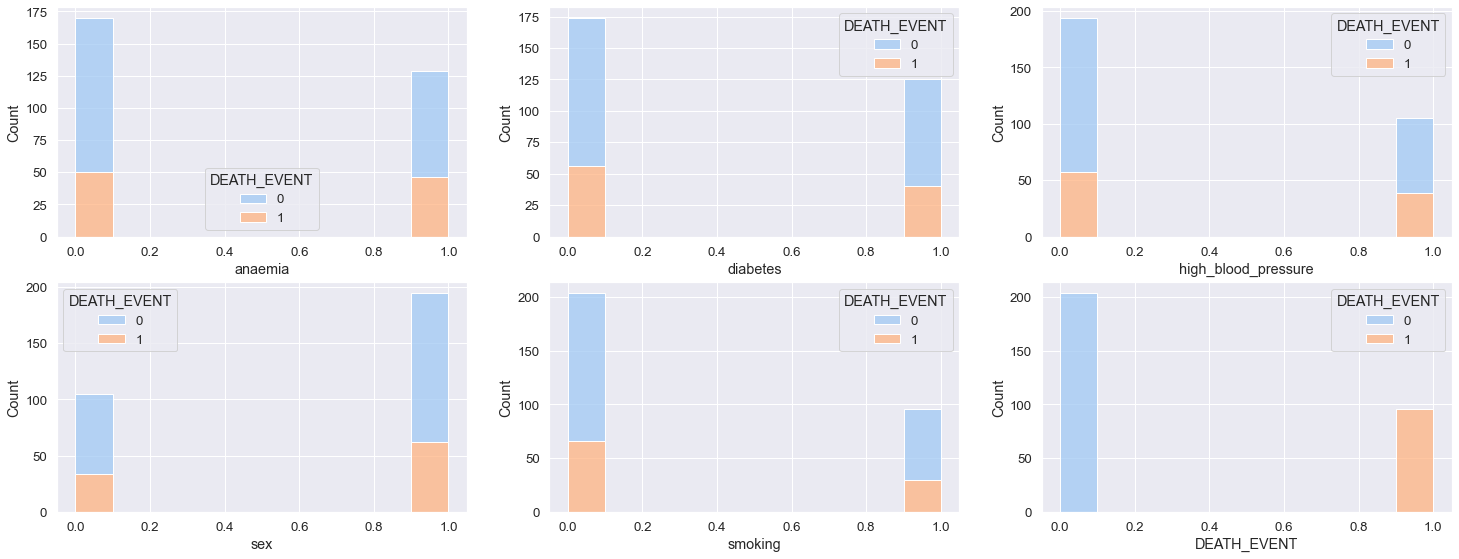

In [14]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(25, 60))
for idx,feature in enumerate(props_binarias):
    plt.subplot(df_cleaned.shape[1],3,idx+1)
    sns.histplot(data=df_cleaned,x=df_cleaned[feature],hue="DEATH_EVENT",palette="pastel",multiple="stack")

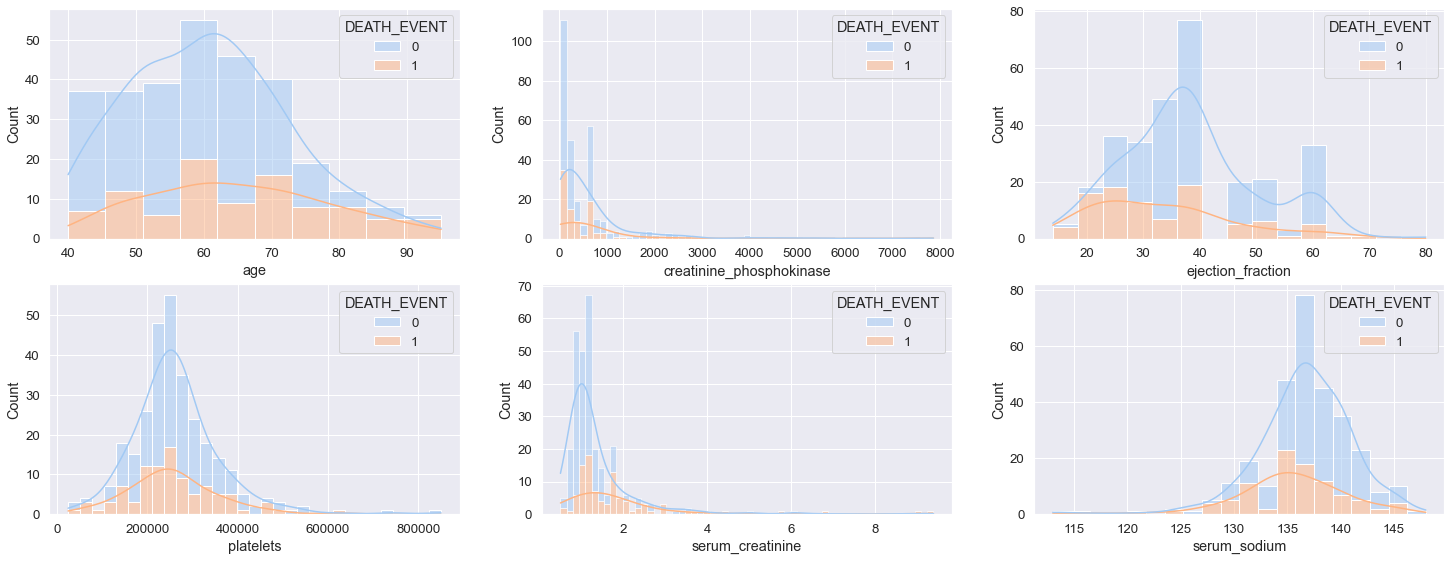

In [15]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(25, 60))

for idx,feature in enumerate(props_continuas):
    plt.subplot(df_cleaned.shape[1],3,idx+1)
    sns.histplot(data=df_cleaned,x=df_cleaned[feature],hue="DEATH_EVENT",palette="pastel",multiple="stack",kde=True)

## GRÁFICOS DE DISTRIBUCIÓN DE VARIABLES CONTINUAS CON DESCARTE DE 2.5% SUPERIOR (VER)  

In [19]:
df_cleaned_bis = df_cleaned[(df_cleaned["serum_creatinine"]<=df_cleaned["serum_creatinine"].quantile(0.975))&(df_cleaned["creatinine_phosphokinase"]<=df_cleaned["creatinine_phosphokinase"].quantile(0.975))&(df_cleaned["platelets"]<=df_cleaned["platelets"].quantile(0.975))]

In [20]:
df_cleaned_bis.describe()   # SI HACEMOS ESTE FILTRO NOS QUEDAMOS CON 276 PACIENTES

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,60.714978,0.434783,454.818841,0.420290,38.010870,0.351449,254265.705399,1.257101,136.637681,0.648551,0.318841,0.307971
std,11.729962,0.496629,522.736579,0.494502,11.700655,0.478290,78596.481468,0.562349,4.450033,0.478290,0.466874,0.462493
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,0.000000
25%,50.750000,0.000000,117.250000,0.000000,30.000000,0.000000,210750.000000,0.900000,134.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,244.500000,0.000000,38.000000,0.000000,259500.000000,1.100000,137.000000,1.000000,0.000000,0.000000
75%,69.250000,1.000000,582.000000,1.000000,45.000000,1.000000,298500.000000,1.400000,140.000000,1.000000,1.000000,1.000000
max,95.000000,1.000000,2695.000000,1.000000,80.000000,1.000000,481000.000000,3.800000,148.000000,1.000000,1.000000,1.000000


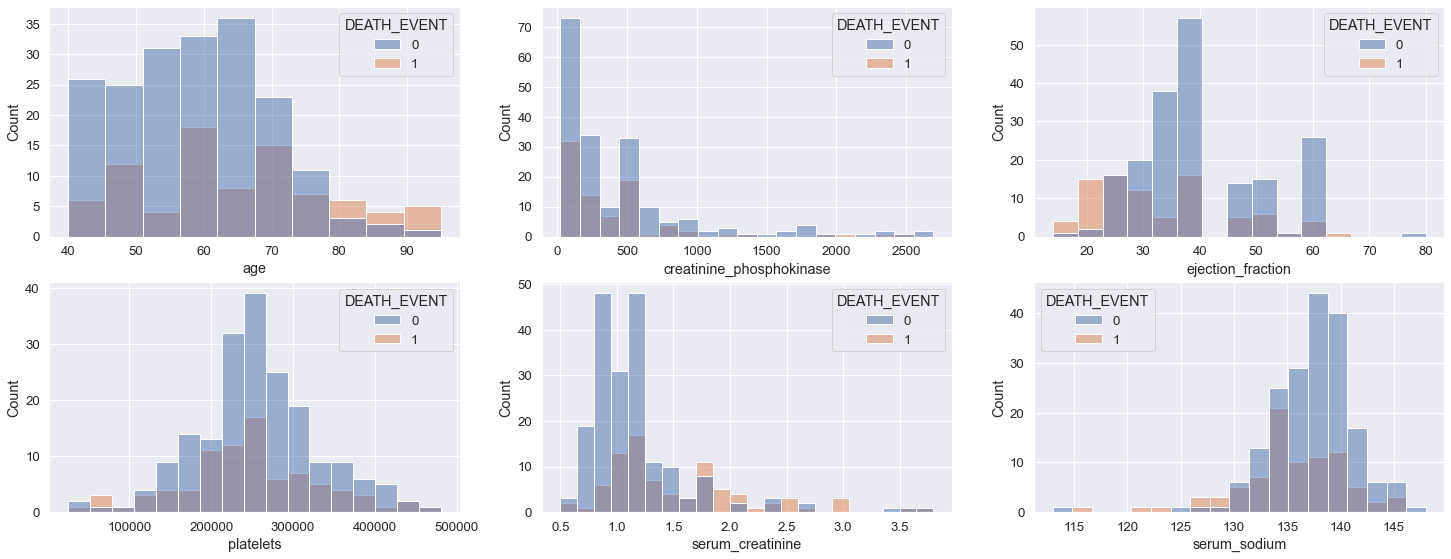

In [21]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(25, 60))

for idx,feature in enumerate(props_continuas):
    plt.subplot(df_cleaned_bis.shape[1],3,idx+1)
    sns.histplot(data=df_cleaned_bis,x=df_cleaned_bis[feature],hue="DEATH_EVENT")

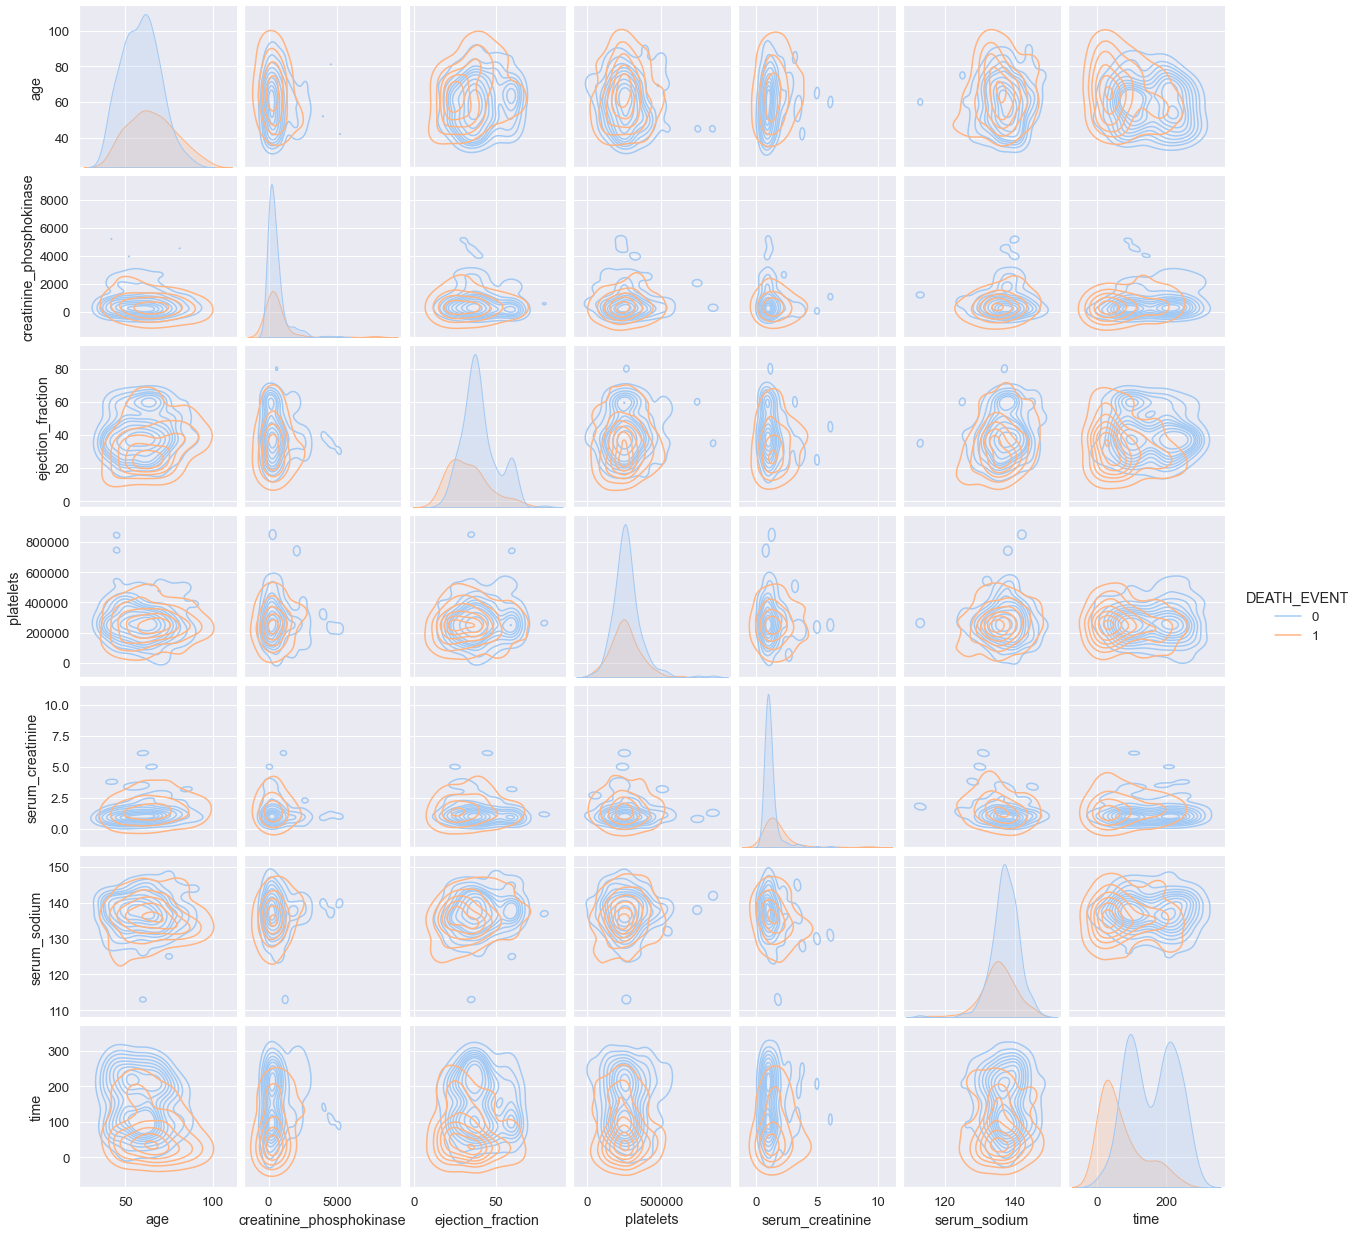

In [16]:
sns.set(font_scale = 1.2)
sns.pairplot(data=df_orig.drop(["anaemia","diabetes","high_blood_pressure","sex","smoking"],axis=1),hue="DEATH_EVENT",palette="pastel",kind="kde")

In [ ]:
from sklearn.decomposition import PCA

X = df_normalized.copy()
y = X['DEATH_EVENT']
X = X.drop(['DEATH_EVENT'], axis=1)
pca = PCA(
    n_components=3, 
)

X = pd.DataFrame(pca.fit_transform(X))
X['target'] = y

X

,0,1,2,target
0,-0.184975,0.287692,0.818452,1
1,-0.373112,-0.175180,0.034716,1
2,-0.964366,-0.086946,0.026650,1
3,-0.099851,0.543036,-0.567965,1
4,0.900035,-0.057615,-0.604180,1
...,...,...,...,...
294,-0.418535,-0.400492,0.624639,0
295,0.262985,-0.322914,0.056184,0
296,0.652173,-0.927320,-0.071948,0
297,-0.971385,-0.268965,-0.037866,0
